In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Group 1: Young(Age 20-30), High-Spender(70-100)
g1 = np.column_stack((np.random.normal(25, 3, 50), np.random.normal(85,5,50)))

# Group 2: Mid(Age 40-50), Low-Spender(10-30)
g2 = np.column_stack((np.random.normal(45, 3, 50), np.random.normal(20,5,50)))

# Group 3: Old(Age 60-70), High-Spender(70-100)
g3 = np.column_stack((np.random.normal(60, 3, 50), np.random.normal(85,5,50)))

# combine into one dataset
X = np.vstack((g1,g2,g3))
df = pd.DataFrame(X, columns = ['Age', 'Spending-Score'])

print(df.head())

         Age  Spending-Score
0  26.490142       86.620420
1  24.585207       83.074589
2  26.943066       81.615390
3  29.569090       88.058381
4  24.297540       90.154998


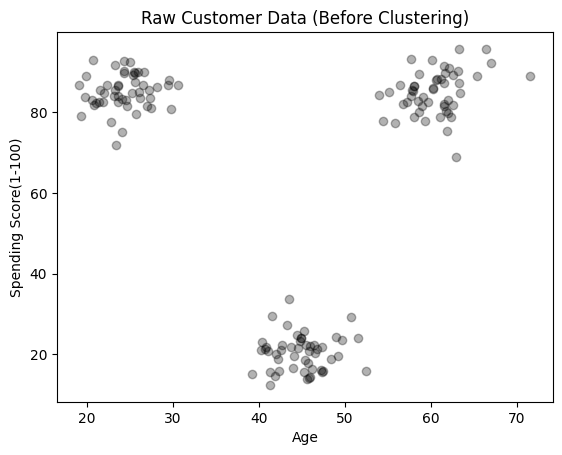

In [11]:
# Visualize
plt.scatter(df['Age'], df['Spending-Score'], c='black', alpha=0.3)
plt.title('Raw Customer Data (Before Clustering)')
plt.xlabel("Age")
plt.ylabel("Spending Score(1-100)")
plt.show()

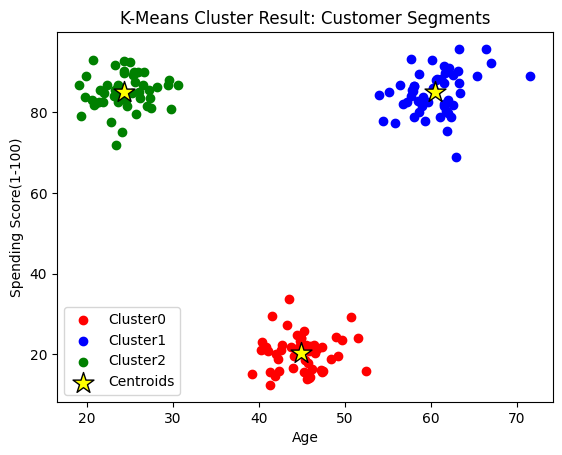

In [16]:
# Initialize and Fit
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X)

# Add the results back to Dataframe
df['Cluster'] = clusters

# plot the result
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(df[df['Cluster'] == i] ['Age'],
                df[df['Cluster'] == i] ['Spending-Score'],
                c=colors[i], label=f"Cluster{i}")

# plot the Controids(The Average Customer in Each Group)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=250, c='yellow', marker = '*', edgecolors = 'black', label='Centroids')

plt.title('K-Means Cluster Result: Customer Segments')
plt.xlabel("Age")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()
    

New Customer belongs to Cluster: 1


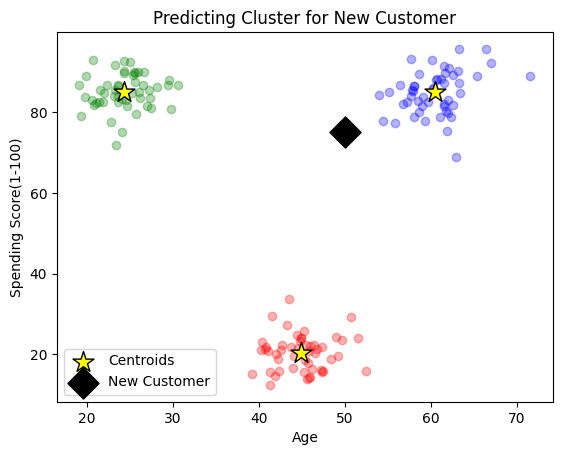

In [20]:
# Predict New Customer
new_customer = np.array([[50,75]])

# use the model to predict 
prediction = kmeans.predict(new_customer)

print(f"New Customer belongs to Cluster: {prediction[0]}")

# plot the result
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(df[df['Cluster'] == i] ['Age'],
                df[df['Cluster'] == i] ['Spending-Score'],
                c=colors[i], alpha=0.3)

# plot the Controids(The Average Customer in Each Group)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=250, c='yellow', marker = '*', edgecolors = 'black', label='Centroids')

# plot the new Customer
plt.scatter(new_customer[0][0], new_customer[0][1],
            s=250, c='black', marker = "D", label = 'New Customer')

plt.title('Predicting Cluster for New Customer')
plt.xlabel("Age")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show()